# Day 7: The Sum of Its Parts

https://adventofcode.com/2018/day/7

In [216]:
import networkx as nx

In [217]:
G = nx.DiGraph()

with open("day07_inp.dat", "r") as f:
    for line in f.readlines():
        l = line.split(" ")
        G.add_edge(l[1], l[7])

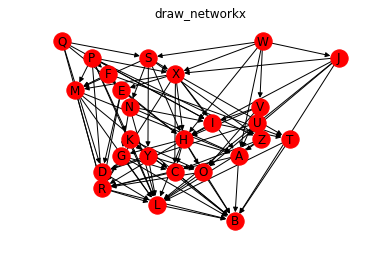

In [218]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

plt.title('draw_networkx')
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()

## Part One

In [219]:
print("Solution for Part One: {}".format(''.join(list(nx.lexicographical_topological_sort(G)))))

Solution for Part One: PFKQWJSVUXEMNIHGTYDOZACRLB


## Part Two

In [221]:
import string

time = {string.ascii_uppercase[k]: k+61 for k in range(26)}
time

{'A': 61,
 'B': 62,
 'C': 63,
 'D': 64,
 'E': 65,
 'F': 66,
 'G': 67,
 'H': 68,
 'I': 69,
 'J': 70,
 'K': 71,
 'L': 72,
 'M': 73,
 'N': 74,
 'O': 75,
 'P': 76,
 'Q': 77,
 'R': 78,
 'S': 79,
 'T': 80,
 'U': 81,
 'V': 82,
 'W': 83,
 'X': 84,
 'Y': 85,
 'Z': 86}

In [222]:
def findworker(workers, step):
    if len(workers) < 5:
        workers[step] = time[step]
    return None

In [223]:
def timestep(workers, G):
    for k in list(workers):
        if workers[k] > 1:
            workers[k] -= 1
        elif workers[k] == 1:
            del workers[k]
            G.remove_node(k)
            
    return workers

In [224]:
def findstep(G):
    freenodes = []
    for node in list(nx.lexicographical_topological_sort(G)):
        if (nx.ancestors(G, node) == set()) and (node not in list(workers)):
            freenodes.append(node)
    return freenodes

In [225]:
G = nx.DiGraph()

with open("day07_inp.dat", "r") as f:
    for line in f.readlines():
        l = line.split(" ")
        G.add_edge(l[1], l[7])

In [226]:
workers = {}

In [227]:
t=0
while t >= 0:
    print(t)
    if findstep(G) != []:
        print(findstep(G))
        for step in findstep(G):
            print(step)
            findworker(workers, step)
    print(workers)
            
    timestep(workers, G)
    print(workers)
    t+=1
    if (list(workers) == []) and (findstep(G) == []): break

0
['P', 'Q', 'W']
P
Q
W
{'P': 76, 'Q': 77, 'W': 83}
{'P': 75, 'Q': 76, 'W': 82}
1
{'P': 75, 'Q': 76, 'W': 82}
{'P': 74, 'Q': 75, 'W': 81}
2
{'P': 74, 'Q': 75, 'W': 81}
{'P': 73, 'Q': 74, 'W': 80}
3
{'P': 73, 'Q': 74, 'W': 80}
{'P': 72, 'Q': 73, 'W': 79}
4
{'P': 72, 'Q': 73, 'W': 79}
{'P': 71, 'Q': 72, 'W': 78}
5
{'P': 71, 'Q': 72, 'W': 78}
{'P': 70, 'Q': 71, 'W': 77}
6
{'P': 70, 'Q': 71, 'W': 77}
{'P': 69, 'Q': 70, 'W': 76}
7
{'P': 69, 'Q': 70, 'W': 76}
{'P': 68, 'Q': 69, 'W': 75}
8
{'P': 68, 'Q': 69, 'W': 75}
{'P': 67, 'Q': 68, 'W': 74}
9
{'P': 67, 'Q': 68, 'W': 74}
{'P': 66, 'Q': 67, 'W': 73}
10
{'P': 66, 'Q': 67, 'W': 73}
{'P': 65, 'Q': 66, 'W': 72}
11
{'P': 65, 'Q': 66, 'W': 72}
{'P': 64, 'Q': 65, 'W': 71}
12
{'P': 64, 'Q': 65, 'W': 71}
{'P': 63, 'Q': 64, 'W': 70}
13
{'P': 63, 'Q': 64, 'W': 70}
{'P': 62, 'Q': 63, 'W': 69}
14
{'P': 62, 'Q': 63, 'W': 69}
{'P': 61, 'Q': 62, 'W': 68}
15
{'P': 61, 'Q': 62, 'W': 68}
{'P': 60, 'Q': 61, 'W': 67}
16
{'P': 60, 'Q': 61, 'W': 67}
{'P': 59, 'Q'

In [228]:
print("Solution for Part Two: {}".format(t))

Solution for Part Two: 864
